<h2 style = "color:blue"> importando bibliotecas</h2>

In [15]:
import os
import cmocean
import numpy as np
import datetime as dt
import datetime as dt
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

<h2 style="color:red">Se você estiver no google colab, por favor descomente as 3 celulas abaixo e depois execute. Finalizando a instalação, reinicie o seu colab.</h2>

In [ ]:
#!pip install basemap

In [ ]:
#!pip install cmocean

In [ ]:
#!pip install netcdf4

<h3 style = "color:blue"> Definindo funções</h3>

In [16]:
def lon360to180(lon):
    """
    Converts longitude values in the range [0,360]
    to longitude values in the range [-180,+180].
    """
    lon = np.asanyarray(lon)
    
    return ((lon + 180.) % 360.) - 180.

In [17]:
def hours_to_dates(reference_date, values):
    """"
    Converts hours values in datetime based in a
    specific date.  The reference date must be in the
    format Day/Month/Year Hour:Minutes
    """
    import datetime as dt
    
    date_python = dt.datetime.strptime(reference_date,
                                  '%d/%m/%Y %H:%M')
    
    Time = [date_python + dt.timedelta(hours = x) for x in values]
    
    return Time

<h3 style="color:blue">selecionado o diretorio de trabalho</h3>

In [ ]:
pwd

In [28]:
os.chdir('/home/gustavo/Documentos/python_aulas/dados')

<h3 style="color:blue"> carregando o dado</h3>

In [31]:
data = Dataset('/home/gustavo/Documentos/python_aulas/dados/DadosMercator/dadosMercator.nc')

In [32]:
data.variables

{'depth': <class 'netCDF4._netCDF4.Variable'>
 float32 depth(depth)
     valid_min: 0.494025
     valid_max: 1684.284
     units: m
     positive: down
     unit_long: Meters
     long_name: Depth
     standard_name: depth
     axis: Z
     _ChunkSizes: 50
     _CoordinateAxisType: Height
     _CoordinateZisPositive: down
 unlimited dimensions: 
 current shape = (39,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     valid_min: -66.0
     valid_max: 1.0
     step: 0.08333588
     units: degrees_north
     unit_long: Degrees North
     long_name: Latitude
     standard_name: latitude
     axis: Y
     _ChunkSizes: 2041
     _CoordinateAxisType: Lat
 unlimited dimensions: 
 current shape = (805,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'vo': <class 'netCDF4._netCDF4.Variable'>
 int16 vo(time, depth, latitude, longitude)
     long_name: Northward velocity
     standard_na

In [46]:
lat = data['latitude'][:]
lon = data['longitude'][:]
tempo = data['time'][:]
depth = data['depth'][:]

In [47]:
lat.min(), lat.max()

(-66.0, 1.0)

In [48]:
lon.min(), lon.max()

(-66.0, 37.0)

In [49]:
#transformando o intervalo das longitudes de [0 360] para [-180 180]
lon = lon360to180(lon)

In [50]:
lon.min(),lon.max()

(-66.0, 37.0)

In [61]:
condx = np.where((lon>-66) & (lon<-30))
condy= np.where((lat>-10)&(lat<10))

condx = condx[0]
condy = condy[0]

lat2 = lat[condy]
lon2 = lon[condx]

temperatura = data['thetao'][:,:,condy,condx]



In [72]:
# Basemap
m = Basemap(projection='mill',lat_ts=0, \
  llcrnrlon=lon2.min(),urcrnrlon=lon2.max(), \
  llcrnrlat=lat2.min(),urcrnrlat=lat2.max(), \
  resolution='i')


In [63]:
x = lon2
y = lat2

x, y = np.meshgrid(x, y)

#r = (u**2 + v**2)**.5

X, Y = m(x, y)

<ipython-input-73-3762c8f76f09>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cmap = m.pcolor(X,Y,temperatura[0,0,:,:],cmap=cmocean.cm.thermal)


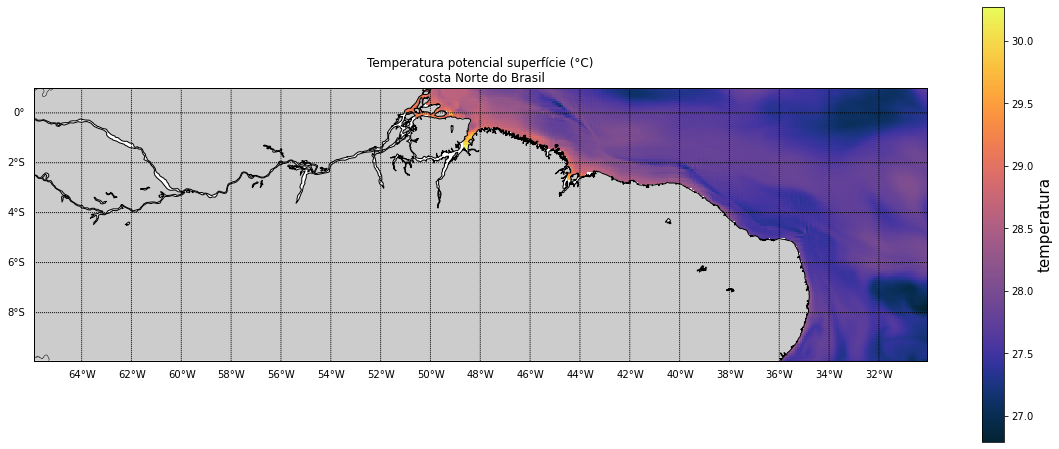

In [73]:
plt.figure(figsize=(20,8))
#plt.figure(figsize=(16,8))
cmap = m.pcolor(X,Y,temperatura[0,0,:,:],cmap=cmocean.cm.thermal)
cbar = plt.colorbar(cmap)
cbar.set_label('temperatura',fontsize=15);
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(lat.min(),lat.max(),2),labels=[1,0,0,0])
m.drawmeridians(np.arange(lon.min(),lon.max(),2),labels=[0,0,0,1])
#m.drawcountries()
#m.quiver(X[0:99:3,0:87:3], Y[0:99:3,0:87:3], u[0:99:3,0:87:3], v[0:99:3,0:87:3], latlon=False,scale=5)
#plt.colorbar()
#plt.ylabel('Latitude')
#plt.xlabel('Longitude')
plt.title('Temperatura potencial superfície (°C)\n costa Norte do Brasil')
plt.show()